# <span style = "color:blue"> Wind Speed Prediction </span>

***

### Context

High precision and reliable wind speed forecasting is a challenge for meteorologists. Severe wind due to convective storms, causes considerable damages (large scale forest damage, outage, buildings/houses damage, etc.). Convective events such as thunderstorms, tornadoes as well as large hail, strong winds, are natural hazards that have the potential to disrupt daily life, especially over complex terrain favoring the initiation of convection. Even ordinary convective events produce severe winds which causes fatal and costly damages. Therefore, wind speed prediction is an important task to get advanced severe weather warning. This dataset contains the responses of a weather sensor that collected different weather variables such as temperatures and precipitation.

### Content

The dataset contains 6574 instances of daily averaged responses from an array of 5 weather variables sensors embedded in a meteorological station. The device was located on the field in a significantly empty area, at 21M. Data were recorded from January 1961 to December 1978 (17 years). Ground Truth daily averaged precipitations, maximum and minimum temperatures, and grass minimum temperature were provided.

### Attribute Information

* DATE (YYYY-MM-DD)
* WIND: Average wind speed [knots]
* IND: First indicator value
* RAIN: Precipitation Amount (mm)
* IND.1: Second indicator value
* T.MAX: Maximum Temperature (°C)
* IND.2: Third indicator value
* T.MIN: Minimum Temperature (°C)
* T.MIN.G: 09utc Grass Minimum Temperature (°C)

Find the dataset <a href = "https://www.kaggle.com/datasets/fedesoriano/wind-speed-prediction-dataset">here </a>

***

### Import necessary libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

### Read 'wind_dataset.csv'

In [42]:
df = pd.read_csv('wind_dataset.csv')

In [43]:
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


### Check info

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


### View basic statistical information about the dataset

In [45]:
df.describe()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
count,6574.000000,6574.000000,6574.000000,6513.000000,5953.000000,6513.000000,5900.000000,6214.000000
mean,9.796834,0.391542,1.885169,0.356364,13.339123,0.464456,6.411678,2.736547
std,4.977272,1.179092,4.030529,1.128552,4.890546,1.177571,4.637243,5.569175
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,-11.500000,-14.400000
25%,6.000000,0.000000,0.000000,0.000000,9.600000,0.000000,3.000000,-1.000000
50%,9.210000,0.000000,0.200000,0.000000,13.300000,0.000000,6.500000,3.000000
75%,12.960000,0.000000,2.000000,0.000000,17.200000,0.000000,10.000000,7.000000
max,30.370000,4.000000,67.000000,4.000000,26.800000,4.000000,18.000000,15.800000


### Check for null values

In [46]:
df.isna().sum()

DATE         0
WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64

### Drop all rows containing any null values

In [47]:
df.dropna(inplace = True)

### Check for duplicates

In [48]:
df.duplicated().sum()

0

In [50]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [53]:
df['Month'] = df['DATE'].dt.month

### Drop 'DATE' column

In [54]:
df.drop(columns = ['DATE'], inplace = True)

In [55]:
df.head()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,Month
0,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0,1
1,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1,1
2,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5,1
3,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2,1
4,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5,1


### Plot distribution plots of all the features

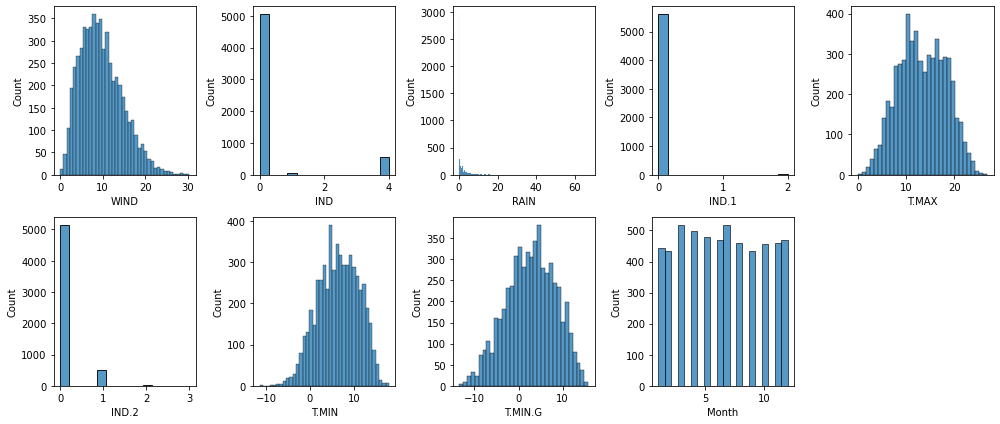

In [64]:
plt.figure(figsize = (14,6))
for i in range(len(df.columns)):
    plt.subplot(2,5,i+1)
    sns.histplot(df[df.columns[i]])
plt.tight_layout()

### Plot pairplot of the dataset

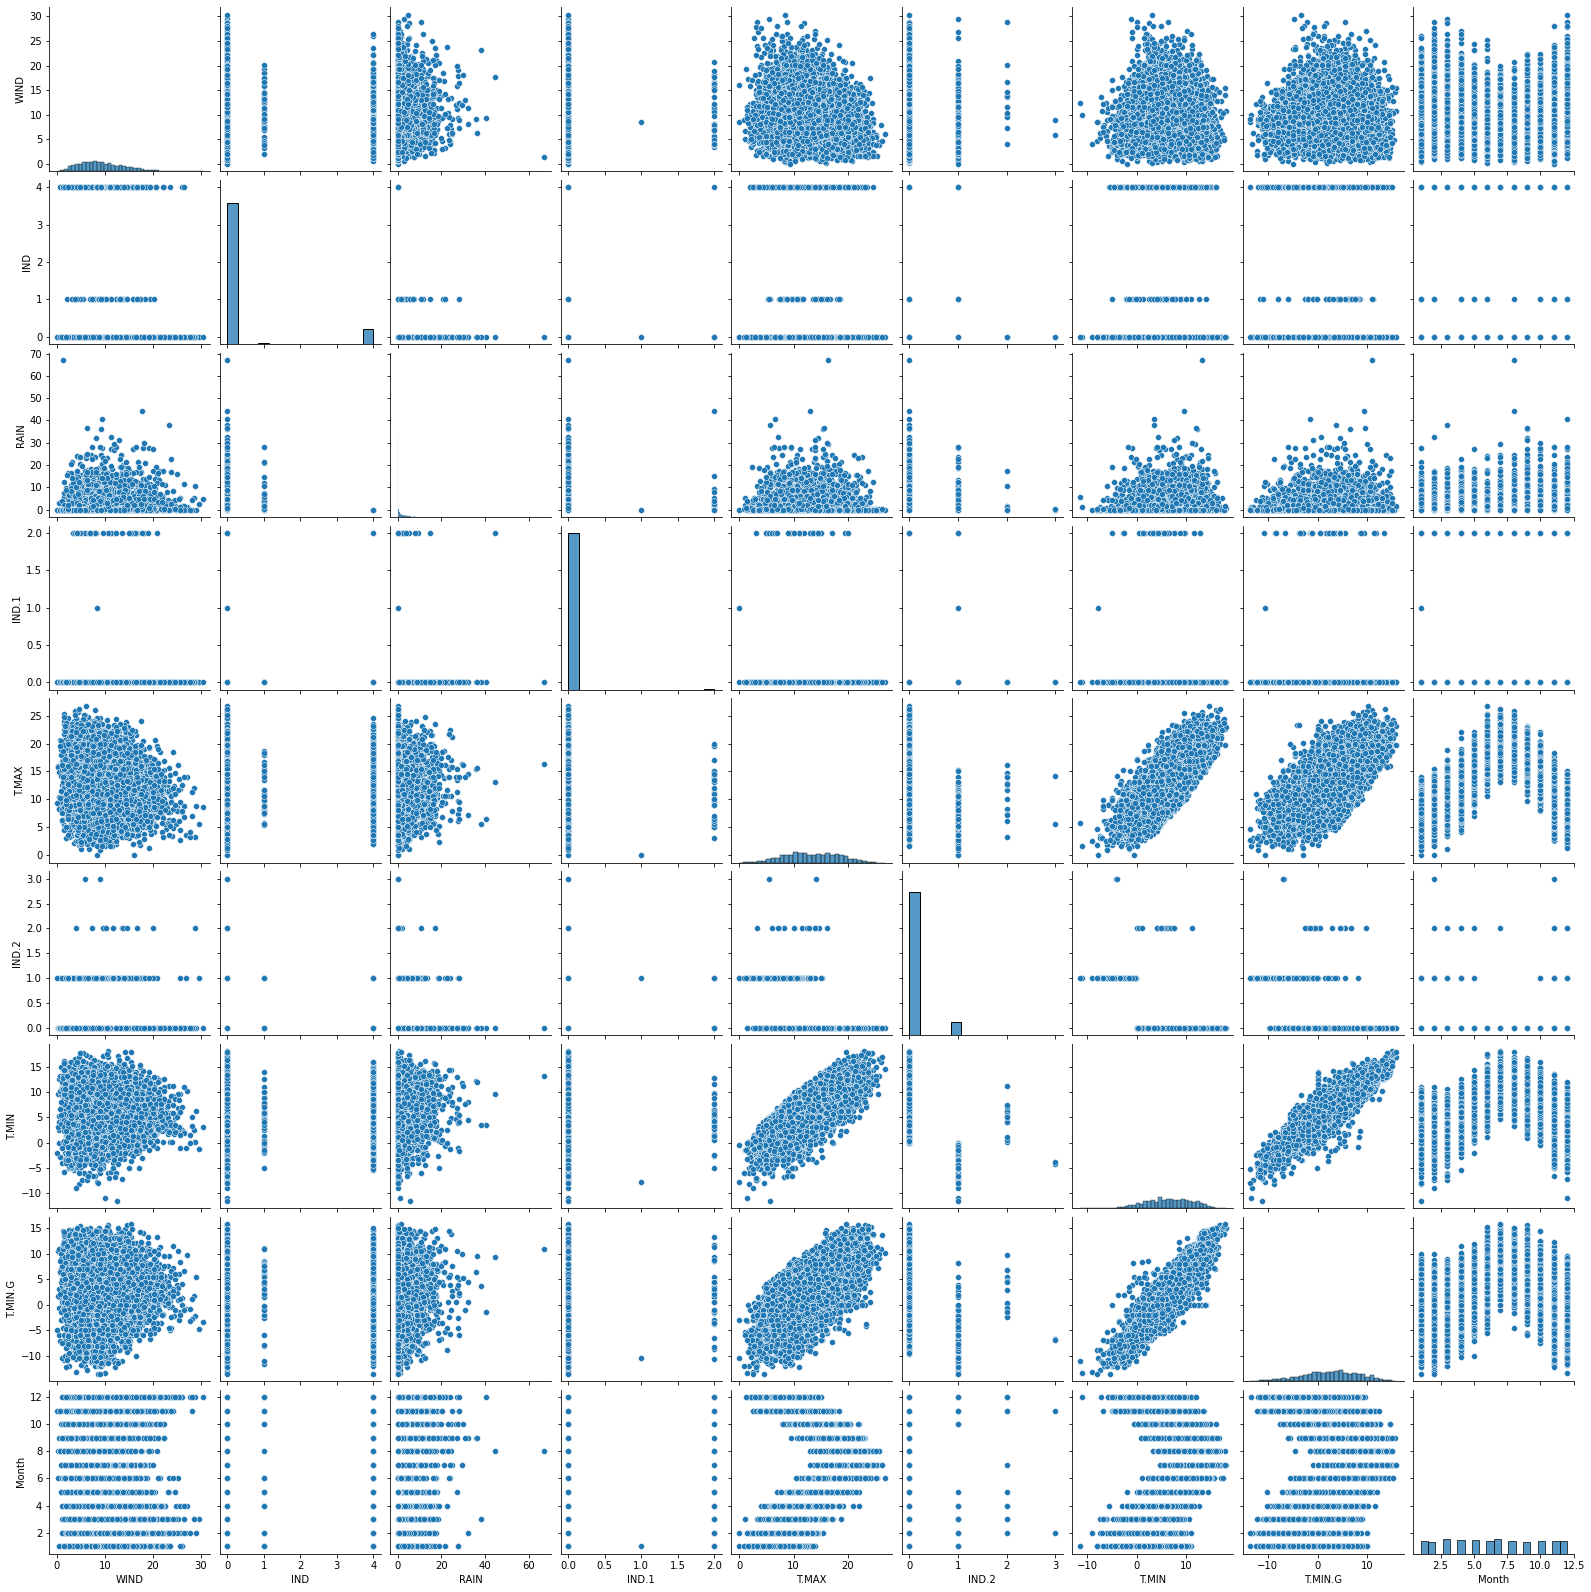

In [65]:
sns.pairplot(df)
plt.show()

### Plot correlation matrix of the dataset on a heatmap

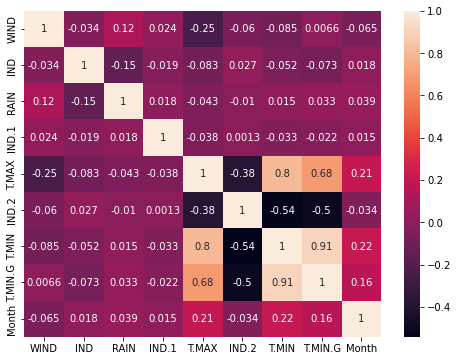

In [66]:
plt.figure(figsize =(8,6))
sns.heatmap(df.corr(), annot = True)
plt.show()

### Split the dataset into Input & Target Variables

In [67]:
X = df.drop(columns = ['WIND'])
y = df['WIND']

### Standardize our Input Variables with Standard Scaler

In [68]:
scaler = StandardScaler()

In [69]:
X = pd.DataFrame(scaler.fit_transform(X), columns =X.columns)

In [70]:
X.head()

,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,Month
0,-0.33596,-0.421715,-0.079885,-0.774158,-0.309141,-0.593770,-0.673867,-1.604967
1,-0.33596,0.811482,-0.079885,-1.244500,-0.309141,-0.485692,-0.297267,-1.604967
2,-0.33596,-0.371381,-0.079885,-1.592145,-0.309141,-1.285470,-0.584200,-1.604967
3,-0.33596,-0.421715,-0.079885,-1.571696,-0.309141,-1.307086,-1.068399,-1.604967
4,-0.33596,2.145349,-0.079885,-1.244500,2.985637,-1.717783,-1.839531,-1.604967


### Split the dataset into Input & Target Variables

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

### Create Linear Regression model & Train it

In [72]:
model = LinearRegression()

In [73]:
model.fit(X_train,y_train)

LinearRegression()

### Check the score of training set

In [74]:
model.score(X_train, y_train)

0.1339835872623628

### Make prediction with X_test

In [75]:
y_pred = model.predict(X_test)

### Evaluate the model

#### Check r2 score

In [76]:
r2_score(y_test, y_pred)

0.12814158013594013

#### Mean Squared Error

In [83]:
mean_squared_error(y_test, y_pred)

21.436712506771357

### Create RandomForestRegressor model & Train it

In [78]:
rf_model = RandomForestRegressor()

In [80]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

### Check the score of our training set

In [81]:
rf_model.score(X_train, y_train)

0.8870398780051565

### Make prediction with X_test

In [84]:
y_pred_rf = rf_model.predict(X_test)

### Evalute the model

#### r2 score

In [86]:
r2_score(y_test,y_pred_rf)

0.16377765409962042

In [87]:
mean_squared_error(y_test, y_pred_rf)

20.560514886808516

***